# Advertising campaign analysis			
						
**Task**			
Client: Omega
Categories: Consumer lending
Period for analysis: Jan – Aug 2020
Client goal: get more targeted visits at a lower cost	
							
1) to assess the current position of the client relative to competitors in the category (cost-benefit analysis)  				
2) to form recommendations on the use of tools, platforms, devices, based on the conclusions from 1)			


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns
sns.set(
    font_scale=1.2,
    style="darkgrid",
    palette="rocket",
    rc={'figure.figsize':(12,6)}
        )

In [2]:
df = pd.read_csv('Yandex.csv', sep=';',encoding='Windows-1251', parse_dates=['Month'])

In [3]:
df['Cost_rub_wo_NDS'] = df['Cost_rub_wo_NDS'].apply(lambda x: x.replace(',','.'))

In [4]:
df['Cost_rub_wo_NDS'] = df['Cost_rub_wo_NDS'].apply(pd.to_numeric)

In [5]:
df.head()

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions
0,Бета,234679,2020-01-07,ВКЛАДЫ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.000000,0
1,Гамма,458303,2019-01-04,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Phrase,76722,2002,19467.482340,3
2,Гамма,458303,2019-01-04,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,9260,116,2590.924703,0
3,Гамма,458303,2019-01-06,ДЕБЕТОВЫЕ КАРТЫ,Desktop,Networks,cpc_video,none,Retargeting,0,0,0.000000,0
4,Гамма,458303,2019-01-04,ДЕБЕТОВЫЕ КАРТЫ,Mobile,Networks,cpc_video,none,Phrase,27140,825,4181.504949,0


In [6]:
df['CPC'] =np.where(df.Clicks == 0, 0, round(df.Cost_rub_wo_NDS / df.Clicks,2))

In [7]:
df['CTR'] = np.where(df.Clicks == 0, 0, df.Clicks / df.Shows)

In [8]:
df_sub = df.query('Category == "ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ" and Month >= "2020-01-01" and Month < "2020-09-01"')

In [9]:
df_group = df_sub.groupby(['Client'], as_index=False)\
.agg({'Cost_rub_wo_NDS':'sum', 'Сonversions':'sum', 'CPC':'mean', 'CTR':'mean'})

In [10]:
df_group['Mean_cost_of_visit'] = round(df_group.Cost_rub_wo_NDS / df_group.Сonversions,2)

In [11]:
df_group.sort_values('Mean_cost_of_visit', inplace=True)

In [12]:
df_group

,Client,Cost_rub_wo_NDS,Сonversions,CPC,CTR,Mean_cost_of_visit
5,Мета,2.317837e+07,147118,28.821522,0.113132,157.55
8,Сигма,6.161001e+07,239619,23.105310,0.067525,257.12
2,Гамма,2.971820e+07,110844,38.380092,0.062775,268.11
4,Лямбда,6.438585e+07,233335,45.128169,0.037696,275.94
6,Омега,3.100255e+07,73655,30.944286,0.077571,420.92
0,Альфа,3.712200e+07,59952,68.564000,0.058575,619.20
1,Бета,1.319091e+08,202512,57.360000,0.056871,651.36
7,Псилон,3.918792e+07,56873,85.952708,0.052873,689.04
3,Зета,3.580139e+07,20947,17.986644,0.072938,1709.14


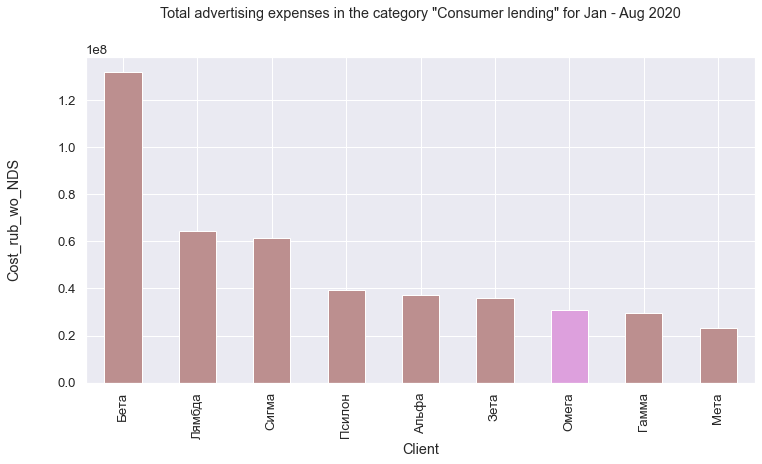

In [13]:
df_group.sort_values("Cost_rub_wo_NDS", ascending=False)\
.plot(kind='bar',x='Client',y='Cost_rub_wo_NDS', 
    color=['#BC8F8F', '#BC8F8F', '#BC8F8F', '#BC8F8F', '#BC8F8F', '#BC8F8F', '#DDA0DD', '#BC8F8F', '#BC8F8F'],
    legend=False, ylabel='Cost_rub_wo_NDS\n\n', 
    title='Total advertising expenses in the category "Consumer lending" for Jan - Aug 2020\n\n');

In the category "Consumer lending" for January-August 2020, Omega used a small budget for advertising expenses relative to competitors - only Gamma and Meta have less expenses.

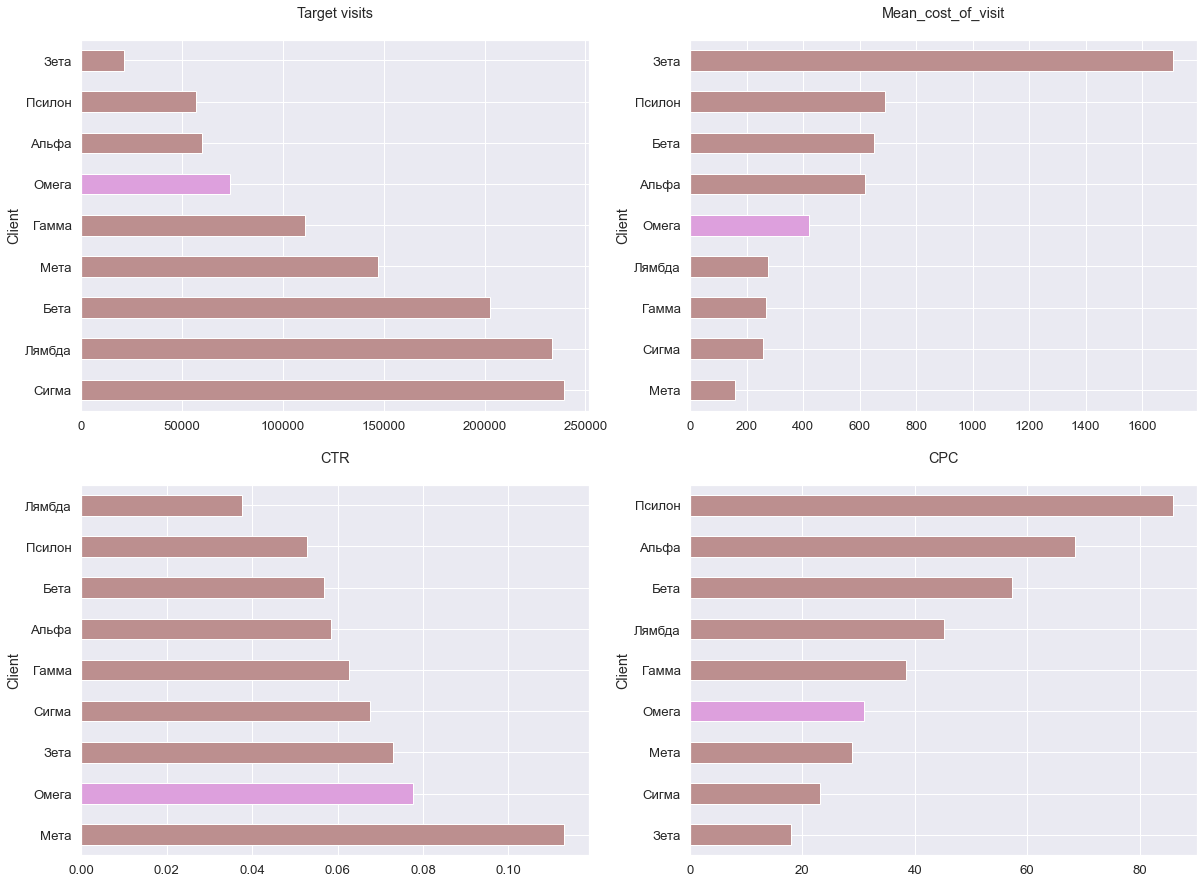

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

df_group.sort_values("Mean_cost_of_visit").plot(kind='barh', x="Client", y='Mean_cost_of_visit', 
    color=['#BC8F8F', '#BC8F8F', '#BC8F8F', '#BC8F8F',  '#DDA0DD','#BC8F8F', '#BC8F8F', '#BC8F8F', '#BC8F8F'],
    legend=False, ylabel='Mean_cost_of_visit\n\n', 
    title='Mean_cost_of_visit\n', ax=ax[0,1])        
df_group.sort_values("Сonversions", ascending=False).plot(kind='barh',x="Client", y="Сonversions", 
    color=['#BC8F8F', '#BC8F8F', '#BC8F8F', '#BC8F8F',  '#BC8F8F','#DDA0DD', '#BC8F8F', '#BC8F8F', '#BC8F8F'],
    legend=False, 
    title='Target visits\n', ax=ax[0,0])
df_group.sort_values("CPC").plot(kind='barh', x="Client", y="CPC", 
    color=['#BC8F8F', '#BC8F8F', '#BC8F8F', '#DDA0DD','#BC8F8F',  '#BC8F8F', '#BC8F8F', '#BC8F8F', '#BC8F8F'],
    legend=False, 
    title='CPC\n' , ax=ax[1,1])
df_group.sort_values("CTR", ascending=False).plot(kind='barh', x="Client", y="CTR", 
    color=['#BC8F8F', '#DDA0DD','#BC8F8F', '#BC8F8F', '#BC8F8F',  '#BC8F8F', '#BC8F8F', '#BC8F8F', '#BC8F8F'],
    legend=False, 
    title='CTR\n' , ax=ax[1,0]);

Based on the overall picture of the effectiveness of advertising campaigns, it can be noted that, having a small budget, Omega managed to use it quite effectively - 2nd place in terms of CTR, 3rd place in terms of cost per click and 4th place in terms of the average cost of a targeted visit.

In [15]:
df_om_met = df_sub.query('Client in ["Омега", "Мета"]')

In order to find points of effective growth in the effectiveness of an advertising company, let's compare some indicators with Mega's competitor, which uses the advertising budget most efficiently - 1st place in terms of average target income.

In [16]:
df_om_met.head()

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,CPC,CTR
1137,Омега,333348,2020-01-08,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,0,0,0.000000,0,0.00,0.000000
1220,Мета,855060,2020-01-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,image_ad,none,Phrase,515957,782,7768.138144,3,9.93,0.001516
1221,Мета,855060,2020-01-02,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,image_ad,none,Phrase,327512,412,6477.552102,11,15.72,0.001258
1222,Мета,855060,2020-01-05,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,image_ad,none,Phrase,204267,335,6450.794517,16,19.26,0.001640
1223,Мета,855060,2020-01-06,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,image_ad,none,Phrase,385758,661,16642.530740,32,25.18,0.001714


In [17]:
def analys(col_for_group):
    df_om_met_analys = df_om_met.groupby(['Client', col_for_group], as_index=False)\
    .agg({'Cost_rub_wo_NDS':'sum', 'Сonversions':'sum', 'CPC':'mean', 'CTR':'mean'})
    df_om_met_analys['Mean_cost_of_visit'] = df_om_met_analys.Cost_rub_wo_NDS / df_om_met_analys.Сonversions
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
    sns.barplot(x=df_om_met_analys[col_for_group], y=df_om_met_analys['Сonversions'], hue=df_om_met_analys['Client'], ax=ax[0,0]).set_title("Target visits")
    sns.barplot(x=df_om_met_analys[col_for_group], y=df_om_met_analys['Mean_cost_of_visit'], hue=df_om_met_analys['Client'], ax=ax[0,1]).set_title("Mean_cost_of_visit")
    sns.barplot(x=df_om_met_analys[col_for_group], y=df_om_met_analys['CTR'], hue=df_om_met_analys['Client'], ax=ax[1,0]).set_title("CTR")
    sns.barplot(x=df_om_met_analys[col_for_group], y=df_om_met_analys['CPC'], hue=df_om_met_analys['Client'], ax=ax[1,1]).set_title("CPC");

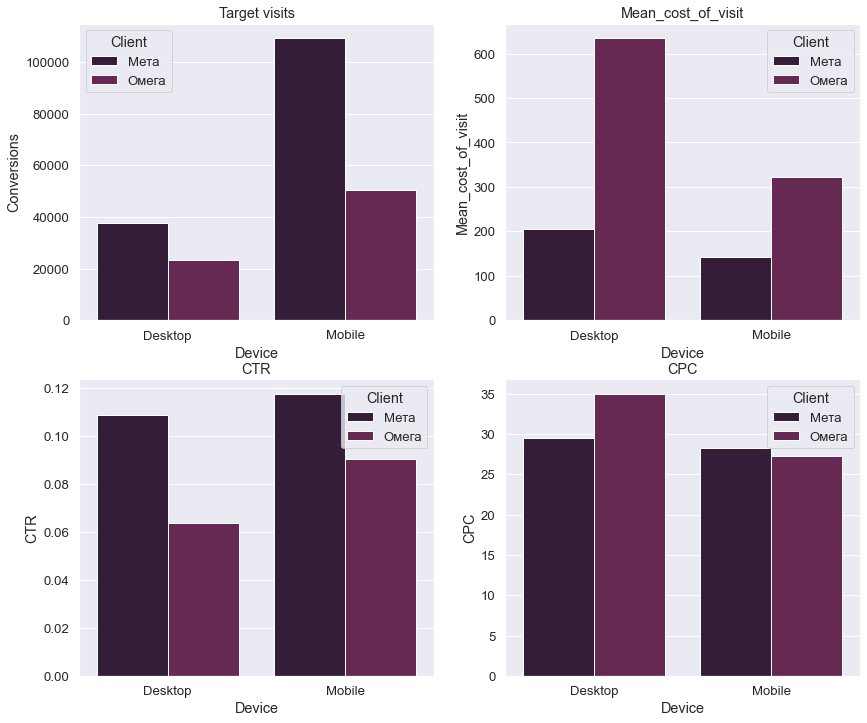

In [18]:
analys('Device')

Compared to Meta, Omega in the category of mobile devices has more than 2 times fewer unexpected visits, although the CTR is only 30% less, therefore, it is necessary to pay attention to why users do not perform a targeted action by clicking on ads. The desktop category has even fewer visits and another 30% lower CTR than the mobile category.

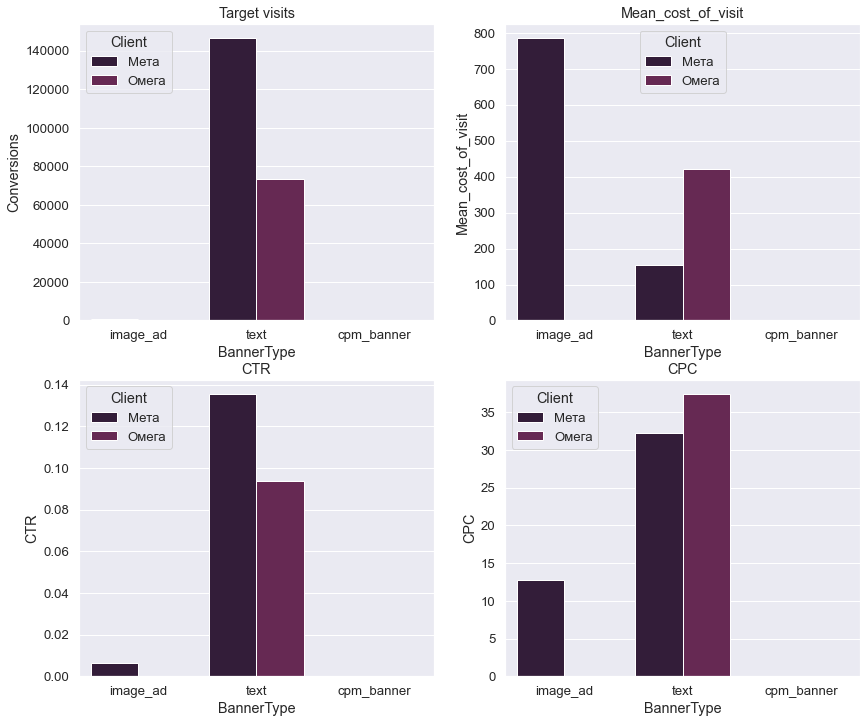

In [19]:
analys('BannerType')

Meta has the highest influx and the lowest cost of targeted visits in the text ad category, while Omega already has targeted visits only in this category, so it makes no sense to start placing ads with pictures.

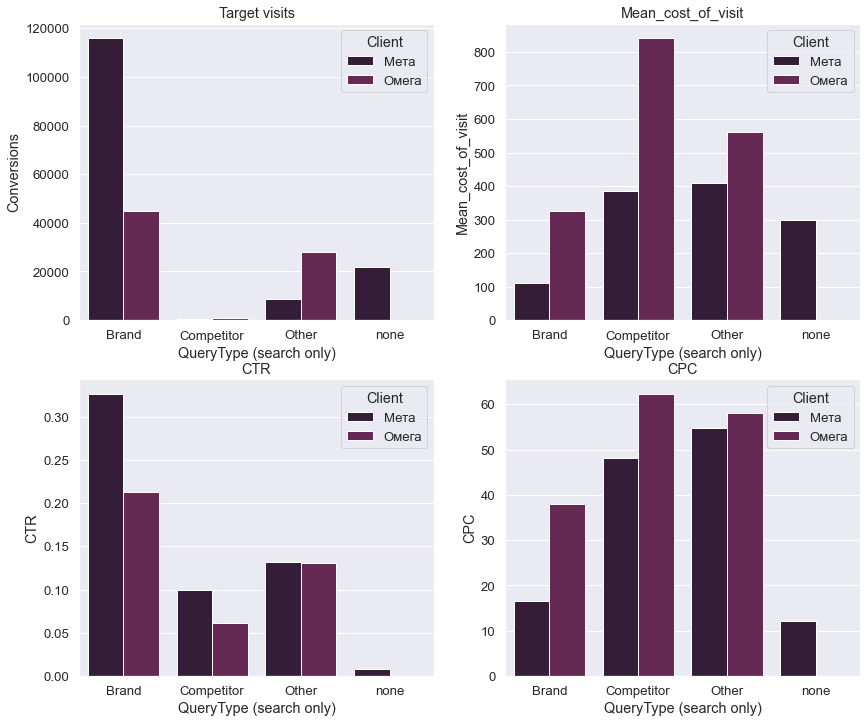

In [20]:
analys('QueryType (search only)')

Ads at the request of a competitor from both Meta and Omega have the lowest performance indicators and almost do not generate targeted visits. Brand queries are the most effective for both companies, and the difference between the number of targeted visits is again visible - Omega has 2.5 times less and CTR - Omega has only 30% less. One gets the impression that users are attracted by the ad, they go to the site through it, and then, for some reason, do not perform targeted actions.

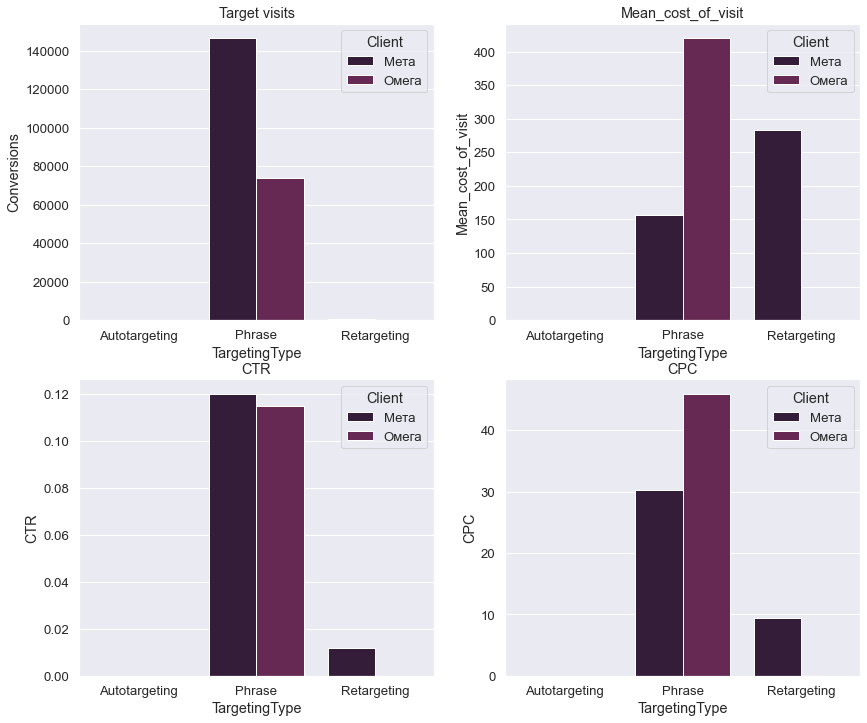

In [21]:
analys('TargetingType')

As you can see from the graphs, the ads in the retargeting category are not effective for Meta, but not at all for Omega.

In [22]:
df_om = df_sub.query('Client == "Омега"')

In [23]:
df_om.head()

,Client,client_id,Month,Category,Device,Place,BannerType,QueryType (search only),TargetingType,Shows,Clicks,Cost_rub_wo_NDS,Сonversions,CPC,CTR
1137,Омега,333348,2020-01-08,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,0,0,0.00000,0,0.00,0.000000
8919,Омега,333348,2020-01-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Networks,text,none,Phrase,0,0,0.00000,0,0.00,0.000000
8920,Омега,333348,2020-01-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Search,text,Brand,Phrase,61842,8316,338391.68510,371,40.69,0.134472
8921,Омега,333348,2020-01-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Search,text,Competitor,Phrase,6203,231,19671.53064,9,85.16,0.037240
8922,Омега,333348,2020-01-01,ПОТРЕБИТЕЛЬСКОЕ КРЕДИТОВАНИЕ,Desktop,Search,text,Other,Phrase,90047,9247,785619.69020,664,84.96,0.102691


In [24]:
df_om_gr = df_om.groupby(['Device', 'Place', 'BannerType', 'QueryType (search only)', 'TargetingType'], as_index=False)\
.agg({'Cost_rub_wo_NDS':'sum', 'Сonversions':'sum', 'CPC':'mean', 'CTR':'mean'})

In [25]:
df_om_gr ['Mean_cost_of_visit'] = df_om_gr .Cost_rub_wo_NDS / df_om_gr .Сonversions

In [26]:
df_om_gr_fin = df_om_gr.dropna().drop(10).sort_values('Mean_cost_of_visit')

In [27]:
df_om_gr_fin

,Device,Place,BannerType,QueryType (search only),TargetingType,Cost_rub_wo_NDS,Сonversions,CPC,CTR,Mean_cost_of_visit
11,Mobile,Search,text,Brand,Phrase,7.081655e+06,32034,28.260000,0.273519,221.066845
15,Mobile,Search,text,Other,Phrase,8.718378e+06,17786,59.104444,0.158716,490.182058
4,Desktop,Search,text,Brand,Phrase,7.524589e+06,12780,47.662222,0.151433,588.778478
7,Desktop,Search,text,Other,Phrase,7.007242e+06,10258,70.193333,0.130728,683.100174
13,Mobile,Search,text,Competitor,Phrase,4.335261e+05,610,66.811111,0.080398,710.698443
5,Desktop,Search,text,Competitor,Phrase,2.371585e+05,186,64.917778,0.049865,1275.045858


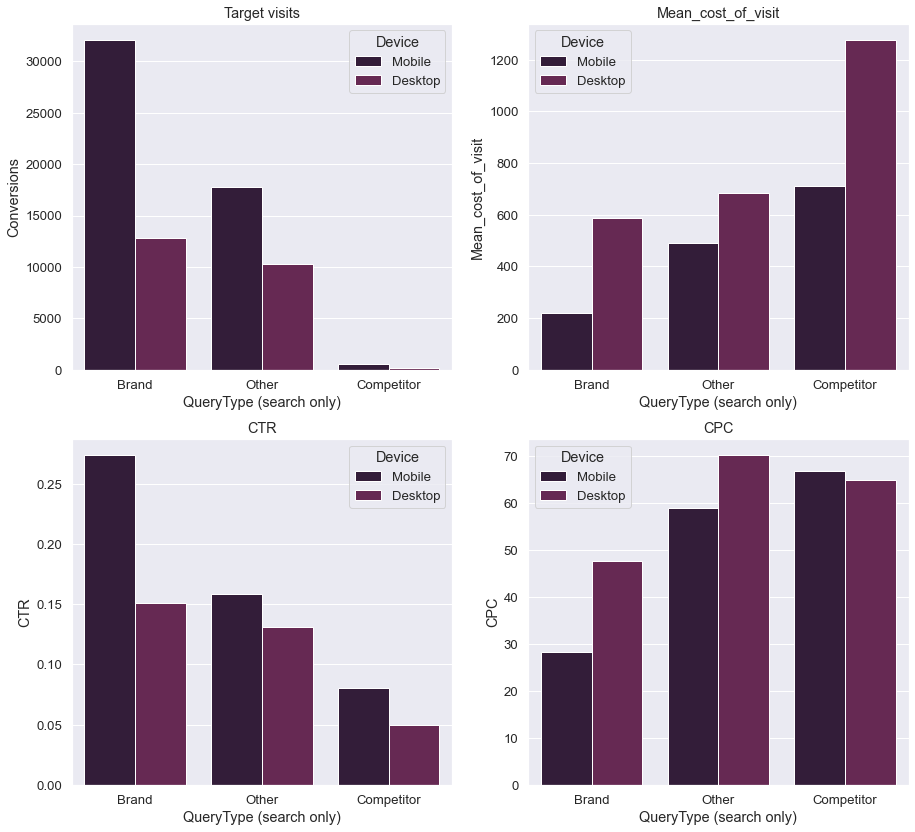

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 14))
sns.barplot(x=df_om_gr_fin['QueryType (search only)'], y=df_om_gr_fin['Сonversions'], hue=df_om_gr_fin['Device'], ax=ax[0,0]).set_title("Target visits")
sns.barplot(x=df_om_gr_fin['QueryType (search only)'], y=df_om_gr_fin['Mean_cost_of_visit'], hue=df_om_gr_fin['Device'], ax=ax[0,1]).set_title("Mean_cost_of_visit")
sns.barplot(x=df_om_gr_fin['QueryType (search only)'], y=df_om_gr_fin['CTR'], hue=df_om_gr_fin['Device'], ax=ax[1,0]).set_title("CTR")
sns.barplot(x=df_om_gr_fin['QueryType (search only)'], y=df_om_gr_fin['CPC'], hue=df_om_gr_fin['Device'], ax=ax[1,1]).set_title("CPC");

The largest number of targeted visits comes from mobile devices for brand queries, and the same ads show the highest efficiency - the cost of a visit and a click are the lowest.
Accordingly, it is necessary to increase activity in this segment at the expense of the least efficient one.
Based on the analysis, ads in the query segment by competitors are the least effective both in the category of mobile devices and desktop.
As for the segment of other requests, the situation here is ambiguous, additional information and analysis are needed here.